Data source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

In [4]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
display(df.head(), df.dtypes, df.isnull().any(), df.duplicated())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [7]:
display(df.duplicated().any())

False

In [19]:
df['balanceOrigDiff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [21]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,False,False,False,True


In [22]:
df['log_amount'] = np.log1p(df['amount'])
df['log_oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
df['log_oldbalanceDest'] = np.log1p(df['oldbalanceDest'])

In [23]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,log_amount,log_oldbalanceOrg,log_oldbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00,False,False,True,False,9.194276,12.044359,0.000000
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00,False,False,True,False,7.531166,9.964112,0.000000
2,1,181.00,181.00,0.00,0.00,0.00,1,0,181.00,0.00,False,False,False,True,5.204007,5.204007,0.000000
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,181.00,-21182.00,True,False,False,False,5.204007,5.204007,9.960954
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00,False,False,True,False,9.364703,10.634773,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13,True,False,False,False,12.735768,12.735768,0.000000
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00,False,False,False,True,15.657870,15.657870,0.000000
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,6311409.27,True,False,False,False,15.657870,15.657870,11.134441
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,850002.52,0.00,False,False,False,True,13.652996,13.652996,0.000000


KNN Model

In [33]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'balanceOrigDiff', 'balanceDestDiff', 'log_amount', 'log_oldbalanceOrg', 'log_oldbalanceDest', 
            'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
X = df[features]
y = df['isFraud'].astype(int)
display(X, y)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,balanceOrigDiff,balanceDestDiff,log_amount,log_oldbalanceOrg,log_oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,1,9839.64,0.00,9.194276,12.044359,0.000000,False,False,True,False
1,1864.28,21249.00,19384.72,0.00,0.00,1,1864.28,0.00,7.531166,9.964112,0.000000,False,False,True,False
2,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,5.204007,5.204007,0.000000,False,False,False,True
3,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00,5.204007,5.204007,9.960954,True,False,False,False
4,11668.14,41554.00,29885.86,0.00,0.00,1,11668.14,0.00,9.364703,10.634773,0.000000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,743,339682.13,339682.13,12.735768,12.735768,0.000000,True,False,False,False
6362616,6311409.28,6311409.28,0.00,0.00,0.00,743,6311409.28,0.00,15.657870,15.657870,0.000000,False,False,False,True
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,743,6311409.28,6311409.27,15.657870,15.657870,11.134441,True,False,False,False
6362618,850002.52,850002.52,0.00,0.00,0.00,743,850002.52,0.00,13.652996,13.652996,0.000000,False,False,False,True


0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [35]:
# Address class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


--> model is highly accurate due to high dataset imbalance.

### Evaluate the Model on the Correct Target:
Predict the target and evaluate using metrics other than accuracy (due to class imbalance, accuracy alone can be misleading). Use precision, recall, and F1-score to get a better understanding of performance:

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269605
           1       1.00      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



array([[1263598,    6007],
       [    401, 1271757]])

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [90]:
# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:")
print(conf_matrix)

KNN Confusion Matrix:
[[1263598    6007]
 [    401 1271757]]


In [50]:
# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp

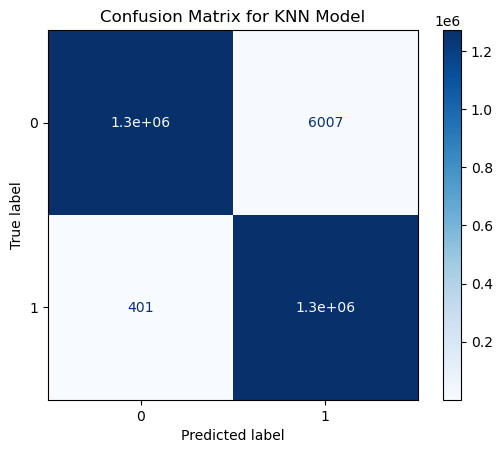

In [51]:
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Optional: Change the color scheme if needed
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [53]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [54]:
# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)
y_prob

array([1., 0., 1., ..., 0., 1., 0.])

In [55]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
precision
recall

array([1.        , 0.99995048, 0.99983571, 0.99968479, 0.99945526,
       0.99855678, 0.        ])

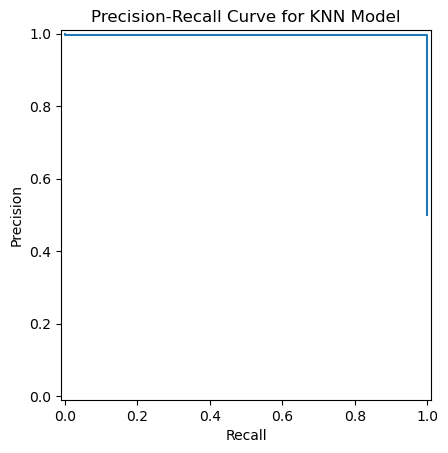

In [56]:
# Display precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve for KNN Model")
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)
y_prob

array([1., 0., 1., ..., 0., 1., 0.])

In [52]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [53]:
# Add a 0 to the end of thresholds to match precision and recall arrays
thresholds = np.append(thresholds, 1)

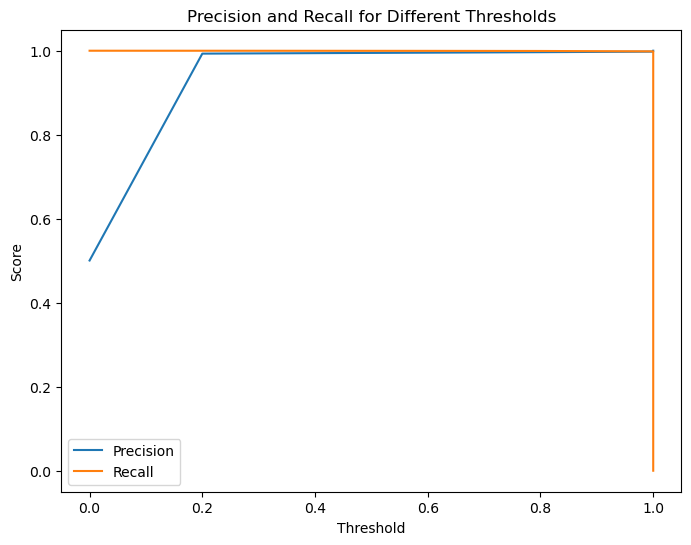

In [54]:
# Plot Precision and Recall against Thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.title("Precision and Recall for Different Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

---

In [57]:
# Set a new threshold for classification
threshold = 0.4

# Apply the threshold to get new predictions
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred_threshold

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1269605
           1       0.99      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [58]:
# Set a new threshold for classification
threshold = 0.5

# Apply the threshold to get new predictions
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred_threshold

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269605
           1       1.00      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



---

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics= import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_train_pred = knn.predict(X_train)

# Predict on the test set (you already have y_pred from the code)
y_test_pred = y_pred  # This is already calculated as y_pred

# Calculate MAE, RMSE, and R² for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
r2_train = r2_score(y_train, y_train_pred)

# Print training set metrics
print(f"Training Set MAE: {mae_train:.2f}")
print(f"Training Set RMSE: {rmse_train:.2f}")
print(f"Training Set R² score: {r2_train:.2f}")

In [ ]:
# Calculate MAE, RMSE, and R² for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)  # RMSE
r2_test = r2_score(y_test, y_test_pred)

# Print test set metrics
print(f"Test Set MAE: {mae_test:.2f}")
print(f"Test Set RMSE: {rmse_test:.2f}")
print(f"Test Set R² score: {r2_test:.2f}")

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_mae = cross_val_score(knn, X_res, y_res, cv=5, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(knn, X_res, y_res, cv=5, scoring='neg_root_mean_squared_error')
cv_r2 = cross_val_score(knn, X_res, y_res, cv=5, scoring='r2')

# Convert negative MAE and RMSE back to positive values and print results
print(f"Cross-Validation MAE: {-cv_mae.mean():.2f}")
print(f"Cross-Validation RMSE: {-cv_rmse.mean():.2f}")
print(f"Cross-Validation R² score: {cv_r2.mean():.2f}")